In [ ]:
# Importing all the required libraries
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
# Importing data
data=pd.read_csv("temperature.csv")
data

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [ ]:
# Check for duplicates
datas = data.drop_duplicates()
datas

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [ ]:
# Familiarize with the dataset
datas.isna().sum()

ID            0
Date          0
Element       0
Data_Value    0
dtype: int64

In [ ]:
# unique values of Element
datas['Element'].unique()

array(['TMAX', 'TMIN'], dtype=object)

In [ ]:
data.columns

Index(['ID', 'Date', 'Element', 'Data_Value'], dtype='object')

In [ ]:
# checking data types
datas.dtypes

ID            object
Date          object
Element       object
Data_Value     int64
dtype: object

In [ ]:
datas['Date']=datas['Date'].astype('datetime64')

In [ ]:
datas.dtypes

ID                    object
Date          datetime64[ns]
Element               object
Data_Value             int64
dtype: object

In [ ]:
datas.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [ ]:
# Aline graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
df1 = datas[(datas['Date'] >= '2005-01-01') & (datas['Date'] < '2015-01-01')]
df1.sort_values(by='Date',ascending=False)


,ID,Date,Element,Data_Value
47712,USC00200032,2014-12-31,TMIN,-111
46498,USC00201502,2014-12-31,TMIN,-111
46667,USC00205451,2014-12-31,TMIN,-111
61837,USC00202308,2014-12-31,TMIN,-100
61764,USC00200228,2014-12-31,TMAX,-39
...,...,...,...,...
18232,USC00205050,2005-01-01,TMIN,-17
18261,USC00205050,2005-01-01,TMAX,56
2812,USC00203712,2005-01-01,TMIN,-50
1906,USC00205822,2005-01-01,TMIN,-17


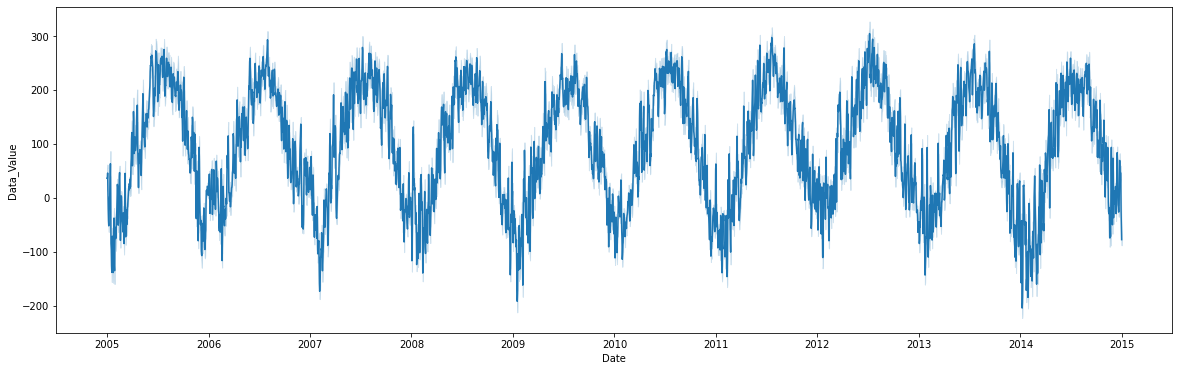

In [ ]:
# ploting line graph
plt.figure(figsize = (20,6))
ax = sns.lineplot(x="Date", y="Data_Value", data=df1)
plt.show()

In [ ]:
df2= datas[(datas['Date'] >= '2015-01-01') & (datas['Date'] < '2016-01-01')]
df2.sort_values(by='Date',ascending=False)
df1 = datas[(datas['Date'] >= '2005-01-01') & (datas['Date'] < '2015-01-01')]
maxtemp = df1[df1['Element']=='TMAX'].max()['Data_Value']
mintemp = df1[df1['Element']=='TMIN'].min()['Data_Value']
print(maxtemp)
print(mintemp)

406
-306


In [ ]:
df3 = df2[(df2['Data_Value'] < mintemp) | (datas['Data_Value'] > maxtemp)]
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Date,Element,Data_Value
127333,USC00208972,2015-02-21,TMIN,-322
128105,USC00203712,2015-02-21,TMIN,-322
137824,USC00208972,2015-02-20,TMIN,-322
140515,USC00201502,2015-02-20,TMIN,-317
141374,USW00094889,2015-02-20,TMIN,-343


In [ ]:
maxtemp = df2[df2['Element']=='TMAX'].max()['Data_Value']
maxtemp

361

In [ ]:
df2= datas[(datas['Date'] >= '2015-01-01') & (datas['Date'] < '2016-01-01')]
df2.sort_values(by='Date',ascending=False)

,ID,Date,Element,Data_Value
10253,USC00201250,2015-12-31,TMIN,-6
32922,USC00207308,2015-12-31,TMAX,6
29445,USC00200230,2015-12-31,TMAX,0
20555,USC00205451,2015-12-31,TMIN,-17
29410,USC00200230,2015-12-31,TMIN,-17
...,...,...,...,...
45090,USC00201502,2015-01-01,TMAX,-67
45006,USC00208080,2015-01-01,TMAX,-50
45004,USC00208080,2015-01-01,TMIN,-133
44584,USC00208202,2015-01-01,TMAX,-56


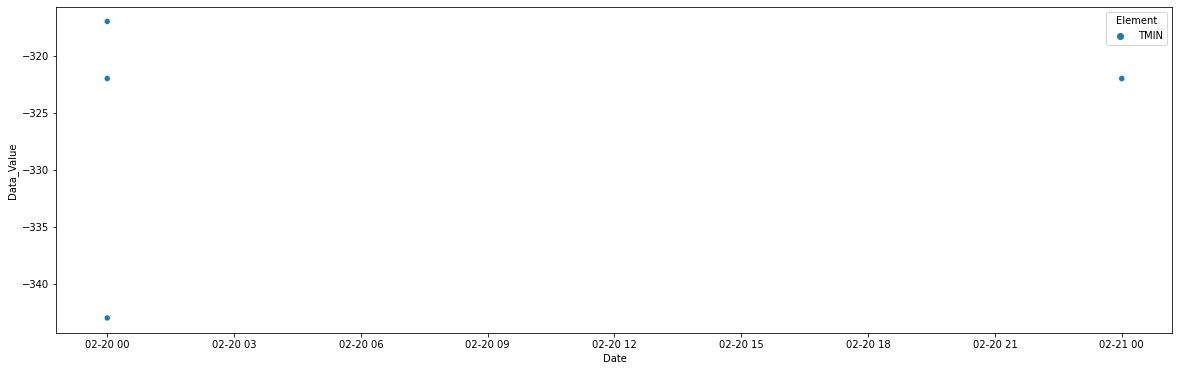

In [ ]:
# a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
plt.figure(figsize = (20,6))
splot=sns.scatterplot(data=df3, x='Date', y="Data_Value", hue="Element")
splot

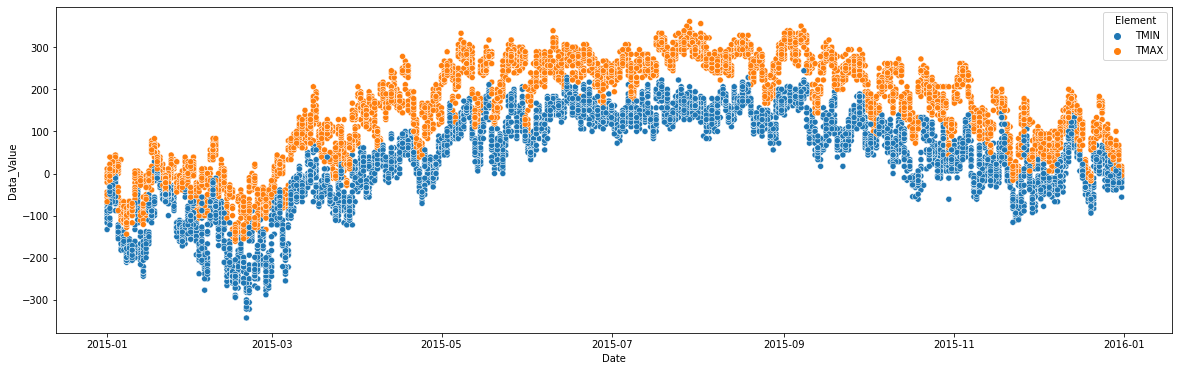

In [ ]:
plt.figure(figsize = (20,6))
splot=sns.scatterplot(data=df2, x='Date', y="Data_Value", hue="Element")
splot

In [ ]:
# Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization
df = datas[~((datas.Date.dt.month == 2) & (datas.Date.dt.day == 29))]
df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [ ]:
datas.shape

(165085, 4)

In [ ]:
df.shape

(165002, 4)